# Credit Card Fraud Detection Project

Analysis: Data visualization This data(creditcard.csv) set contains 284,807 transactions, the mean value of all transactions is  88.35,𝑤ℎ𝑖𝑙𝑒𝑡ℎ𝑒𝑙𝑎𝑟𝑔𝑒𝑠𝑡𝑡𝑟𝑎𝑛𝑠𝑎𝑐𝑡𝑖𝑜𝑛𝑟𝑒𝑐𝑜𝑟𝑑𝑒𝑑𝑖𝑛𝑖𝑡𝑖𝑠 25,691.16, but the vast majority of transactions are relatively small and only a tiny fraction of transactions comes even close to the maximum.
In the dadaset we have 30 parameters, we have time and the amount of the transaction, and 28 other features that result a PCA transformation. Feature'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. Feature'Amount' is the transaction amount, this feature can be used example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 for valid transactions.

PCA: Principal component analysis: a statistocal procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variales(entities each of which takes on various numerical values) into a set of values of linearly uncorrelated variables called principal conponents.

The main challenges in credit card detection are:

Huge size of data
Imbalanced data set: 99% of transactions are legitimate
Adaptive techniques: fraudsters change styles to bluff detection system
Availabililty of data: banks rarely reveal customer information because of privacy protection

In [55]:
import sys
import numpy
import pandas
import matplotlib
import seaborn
import scipy
import sklearn
import keras

print('python: {}' .format(sys.version))
print('Numpy: {}' .format(numpy.__version__))
print('Pandas: {}' .format(pandas.__version__))
print('Matplotlib: {}' .format(matplotlib.__version__))
print('Seaborn: {}' .format(seaborn.__version__))
print('Scipy: {}' .format(seaborn.__version__))
print('Sklearn: {}' .format(sklearn.__version__))
print('keras: {}' .format(keras.__version__))


python: 3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]
Numpy: 1.16.5
Pandas: 0.25.1
Matplotlib: 3.1.1
Seaborn: 0.9.0
Scipy: 0.9.0
Sklearn: 0.21.3
keras: 2.3.1


In [56]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sms

In [57]:
# Load the dataset from the csv file using pandas
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [58]:
data.tail(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [59]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [60]:
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [61]:
data.sort_values(by='Class')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
189814,128571.0,-5.809290,0.180870,-2.698260,4.886691,1.496554,1.833805,-1.417844,-6.071499,-3.150815,...,2.303073,-0.183163,0.049842,-0.220697,1.390550,1.035940,1.110960,-1.758895,0.76,0
189815,128571.0,2.136948,0.024433,-2.440339,-0.280203,0.951061,-0.799101,0.607870,-0.314005,0.054811,...,0.152297,0.488799,-0.077620,0.236435,0.479284,0.221746,-0.099236,-0.088561,3.70,0
189816,128571.0,-1.156768,0.135422,3.113868,4.420894,0.757698,1.234795,-1.234156,0.721934,-1.676275,...,0.390024,0.767668,-0.064709,0.746197,-0.080808,0.475584,0.105618,0.128784,9.81,0
189817,128571.0,1.767787,-0.301029,-2.215079,0.511939,0.423751,-0.984541,0.509947,-0.398095,0.540116,...,0.258679,0.570469,-0.257998,-0.764858,0.285443,-0.074687,-0.027915,-0.005763,174.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42741,41227.0,-9.001351,6.613284,-12.423635,7.519929,-10.266255,-2.113208,-9.984287,5.541941,-7.383705,...,1.775891,-1.224758,0.082594,0.452089,0.463827,-0.296928,0.526506,-0.450890,459.07,1
107067,70270.0,-1.512516,1.133139,-1.601052,2.813401,-2.664503,-0.310371,-1.520895,0.852996,-1.496495,...,0.729828,0.485286,0.567005,0.323586,0.040871,0.825814,0.414482,0.267265,318.11,1
10897,18690.0,-15.398845,7.472324,-19.026912,11.165526,-6.893856,-2.120937,-14.913330,-0.721214,-7.175097,...,-2.444884,0.727495,-0.345078,-0.981749,0.995271,0.816762,2.262942,-1.178063,1.00,1
191690,129371.0,1.183931,3.057250,-6.161997,5.543972,1.617041,-1.848006,-1.005508,0.339937,-2.959806,...,0.109185,-0.931072,-0.064175,-0.007013,0.345419,0.064558,0.476629,0.323740,0.00,1


In [62]:
data.sort_values(by='Class').T

,0,189814,189815,189816,189817,189818,189819,189820,189821,189822,...,248296,241445,184379,245347,221018,42741,107067,10897,191690,231978
Time,0.000000,128571.000000,128571.000000,128571.000000,128571.000000,128572.000000,128573.000000,128573.000000,128573.000000,128573.000000,...,153875.000000,151029.000000,126219.000000,152710.000000,142394.000000,41227.000000,70270.000000,18690.000000,129371.000000,146998.000000
V1,-1.359807,-5.809290,2.136948,-1.156768,1.767787,-10.726782,1.875386,1.832912,-1.782616,-5.227966,...,-0.613696,-3.818214,-1.141559,0.051075,-3.367770,-9.001351,-1.512516,-15.398845,1.183931,-2.064240
V2,-0.072781,0.180870,0.024433,0.135422,-0.301029,-8.995586,-0.710529,-1.385675,0.752994,0.369520,...,3.698772,2.551338,1.927650,1.310427,0.099249,6.613284,1.133139,7.472324,3.057250,2.629739
V3,2.536347,-2.698260,-2.440339,3.113868,-2.215079,-1.386454,0.310039,-0.600559,3.397957,-5.010226,...,-5.534941,-4.759158,-3.905356,0.733222,-6.148487,-12.423635,-1.601052,-19.026912,-6.161997,-0.748406
V4,1.378155,4.886691,-0.280203,4.420894,0.511939,7.404944,0.633794,-0.428058,4.637693,5.063297,...,5.620486,1.636967,-0.073943,2.620282,3.401955,7.519929,2.813401,11.165526,5.543972,0.694992
V5,-0.338321,1.496554,0.951061,0.757698,0.423751,1.238957,-1.256214,-1.192135,-0.272344,0.312231,...,1.649263,-1.167900,-0.044858,1.402358,0.458307,-10.266255,-2.664503,-6.893856,1.617041,0.418178
V6,0.462388,1.833805,-0.799101,1.234795,-0.984541,-0.152709,-0.196112,-0.196289,2.351951,1.939584,...,-2.335145,-1.678413,-1.756999,0.528489,-1.571630,-2.113208,-0.310371,-2.120937,-1.848006,1.392520
V7,0.239599,-1.417844,0.607870,-1.234156,0.509947,0.346172,-1.076034,-0.842475,-0.648528,-1.167632,...,-0.907188,-3.144732,-1.217416,1.086014,-1.358708,-9.984287,-1.520895,-14.913330,-1.005508,-1.697801
V8,0.098698,-6.071499,-0.314005,0.721934,-0.398095,-0.453275,0.119164,0.058666,0.126167,-5.868454,...,0.706362,1.245106,0.364563,-0.146423,0.672409,5.541941,0.852996,-0.721214,0.339937,-6.333065
V9,0.363787,-3.150815,0.054811,-1.676275,0.540116,-0.845993,1.576088,-0.134591,0.768138,-2.512989,...,-3.747646,-1.692541,-2.770148,-1.724333,-3.188001,-7.383705,-1.496495,-7.175097,-2.959806,1.724184


In [63]:
print(data.shape)

(284807, 31)


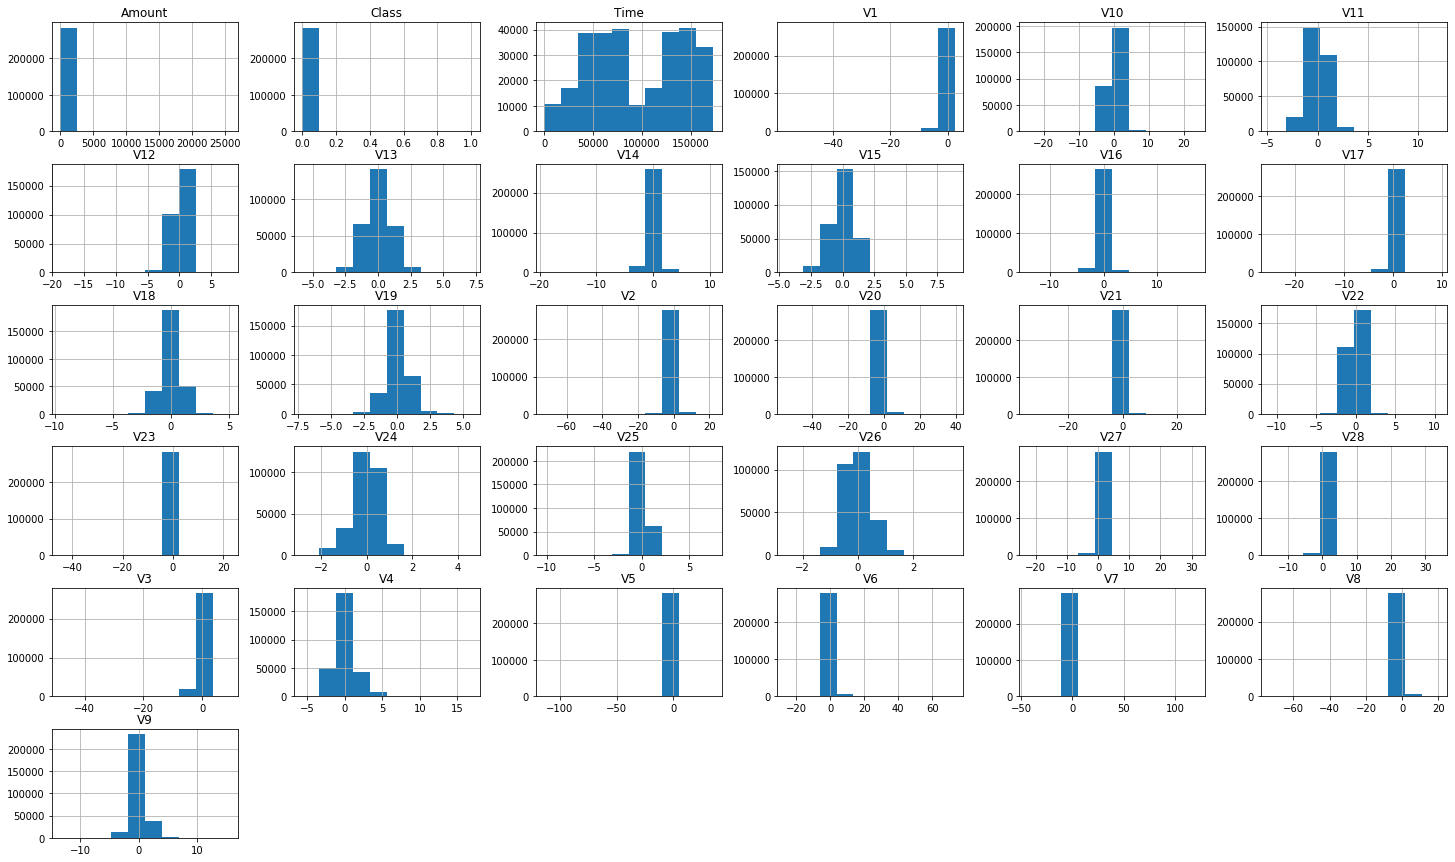

In [64]:
data.hist(figsize = (25,15))
plt.show()

In [65]:
data_train = data.sample(frac = 0.008, random_state = 1)
data_test = data.sample(frac = 0.002, random_state = 1)
print(data_train.shape)
print(data_test.shape)

(2278, 31)
(570, 31)


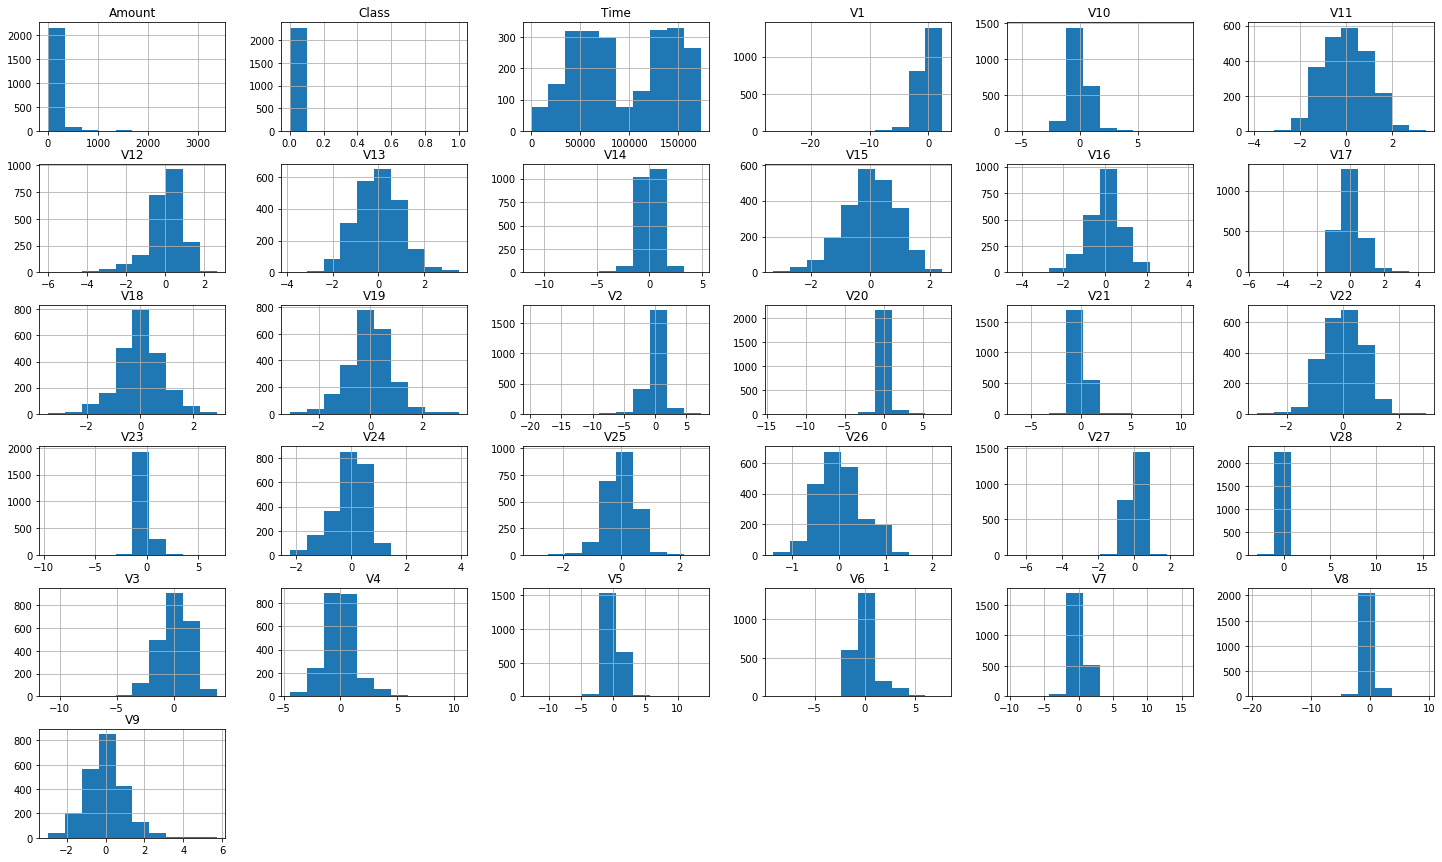

In [66]:
data_train.hist(figsize = (25,15))
plt.show()

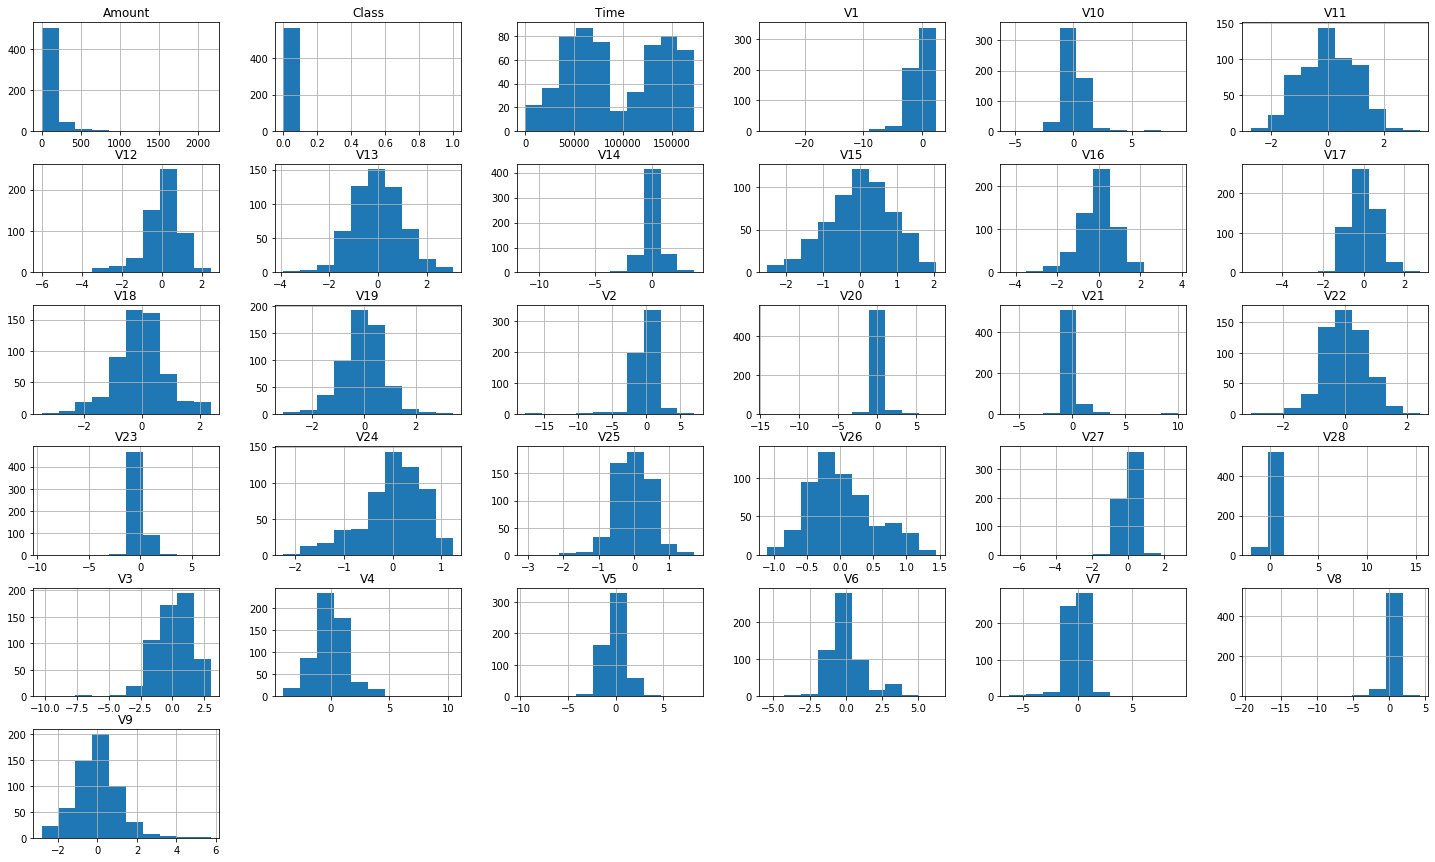

In [67]:
data_test.hist(figsize = (25,15))
plt.show()

In [68]:
# Determine number of fraud cases in dataset
Fraud_train = data[data['Class'] == 1]
Valid_train = data[data['Class'] == 0]

outlier_fraction_train = len(Fraud_train) / float(len(Valid_train))
print(outlier_fraction_train)

print('Fraud Cases: {}'.format(len(Fraud_train)))
print('Valid Cases: {}'.format(len(Valid_train)))

0.0017304750013189597
Fraud Cases: 492
Valid Cases: 284315


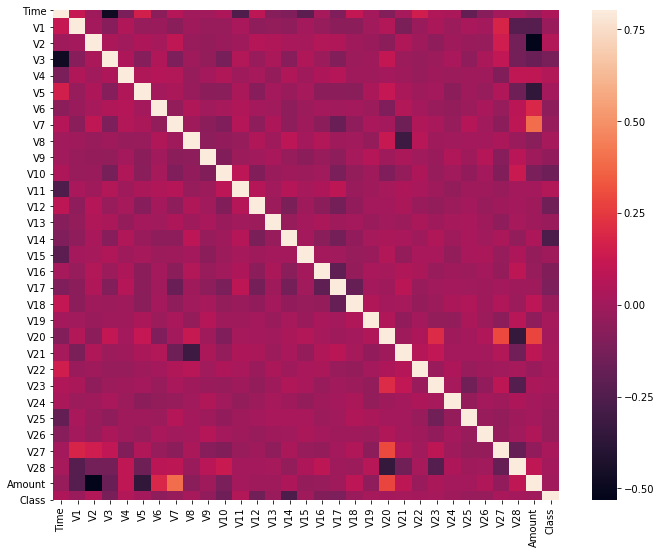

In [69]:
# Check correlation to see if there any strong correlations between variables, it there is a linear relationships.
# Correlation matrix, use pyplot figure.
corrmat = data_train.corr()
fig = plt.figure(figsize = (12,9))

sms.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [70]:
# This is unsupervised learning.
# Get all the columns from the DataFrame
columns = data_train.columns.tolist()

# Filter the columns to remove data we do not want 
columns = [ c for c in columns if c not in ["Class"]]

# Store the variable we'll be predicting on
target = "Class" # This is what we are trying to predict.

X = data_train[columns]
Y = data_train[target]

# Print the shapes of X and Y
print(X.shape)

print(Y.shape)

(2278, 30)
(2278,)


In [71]:
from sklearn.metrics import classification_report, accuracy_score      # Different Algorithms.
from sklearn.ensemble import IsolationForest     # It return the anamoly score of each sample, randomly select value and feature.
from sklearn.neighbors import LocalOutlierFactor   # It is unsupervised outlier detection method.

# define a random state
state = 1

# define the outlier detection methods
classifiers = {
    "Isolation Forest": IsolationForest(max_samples=len(X),    # Parameters
                                       contamination = outlier_fraction_train,
                                       random_state = state),
    "Local Outlier Factor": LocalOutlierFactor(
    n_neighbors = 20,  # 20 is default and standard.
    contamination = outlier_fraction_train)
}

In [72]:
# Fit the model
n_outliers = len(Fraud_train)  # Define a variable

for i, (clf_name, clf) in enumerate(classifiers.items()):
    
    # fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred_train = clf.fit_predict(X)
        scores_pred_train = clf.negative_outlier_factor_
    
    else:  # IsolationForest
        clf.fit(X)
        scores_pred_train = clf.decision_function(X)
        y_pred_train = clf.predict(X)
        
    # Reshape the prediction values to 0 for valid, 1 for fraud
    y_pred_train[y_pred_train == 1] = 0  # Valid
    y_pred_train[y_pred_train == -1] = 1   # Fraud
    
    n_errors = (y_pred_train != Y).sum()   # Not equal to y.
    
    # Run classification matrics
    print('{}: {}'.format(clf_name, n_errors))
    print(accuracy_score(Y, y_pred_train))
    print(classification_report(Y, y_pred_train))

C:\Users\fyant\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


Isolation Forest: 7
0.9969271290605795
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2275
           1       0.00      0.00      0.00         3

    accuracy                           1.00      2278
   macro avg       0.50      0.50      0.50      2278
weighted avg       1.00      1.00      1.00      2278

Local Outlier Factor: 7
0.9969271290605795
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2275
           1       0.00      0.00      0.00         3

    accuracy                           1.00      2278
   macro avg       0.50      0.50      0.50      2278
weighted avg       1.00      1.00      1.00      2278



C:\Users\fyant\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


In [73]:
# Determine number of fraud cases in dataset
Fraud_test = data_test[data_test['Class'] == 1]
Valid_test = data_test[data_test['Class'] == 0]

outlier_fraction_test = len(Fraud_test) / float(len(Valid_test))
print(outlier_fraction_test)

print('Fraud Cases: {}'.format(len(Fraud_test)))
print('Valid Cases: {}'.format(len(Valid_test)))

0.005291005291005291
Fraud Cases: 3
Valid Cases: 567


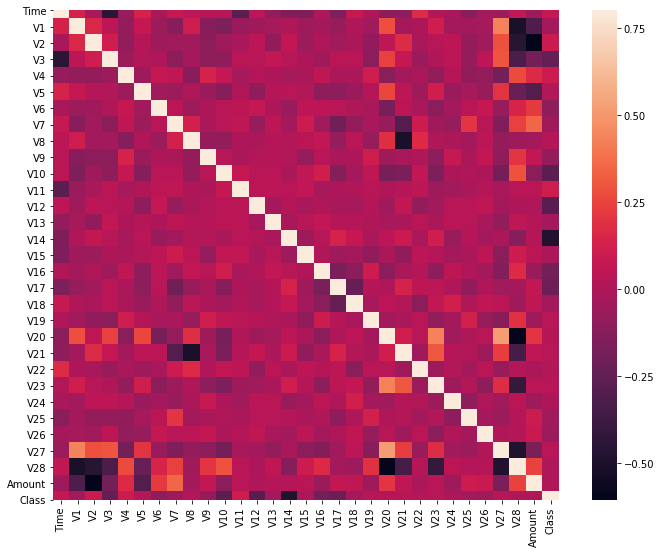

In [74]:
# Check correlation to see if there any strong correlations between variables, it there is a linear relationships.
# Correlation matrix, use pyplot figure.
corrmat = data_test.corr()
fig = plt.figure(figsize = (12,9))

sms.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [75]:
# This is unsupervised learning.
# Get all the columns from the DataFrame
columns = data_test.columns.tolist()

# Filter the columns to remove data we do not want 
columns = [ c for c in columns if c not in ["Class"]]

# Store the variable we'll be predicting on
target = "Class" # This is what we are trying to predict.

X = data_test[columns]
Y = data_test[target]

# Print the shapes of X and Y
print(X.shape)

print(Y.shape)

(570, 30)
(570,)


In [76]:
from sklearn.metrics import classification_report, accuracy_score      # Different Algorithms.
from sklearn.ensemble import IsolationForest     # It return the anamoly score of each sample, randomly select value and feature.
from sklearn.neighbors import LocalOutlierFactor   # It is unsupervised outlier detection method.

# define a random state
state = 1

# define the outlier detection methods
classifiers = {
    "Isolation Forest": IsolationForest(max_samples=len(X),    # Parameters
                                       contamination = outlier_fraction_test,
                                       random_state = state),
    "Local Outlier Factor": LocalOutlierFactor(
    n_neighbors = 20,  # 20 is default and standard.
    contamination = outlier_fraction_test)
}

In [77]:
# Fit the model
n_outliers = len(Fraud_test)  # Define a variable

for i, (clf_name, clf) in enumerate(classifiers.items()):
    
    # fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred_test = clf.fit_predict(X)
        scores_pred_test = clf.negative_outlier_factor_
    
    else:  # IsolationForest
        clf.fit(X)
        scores_pred_test = clf.decision_function(X)
        y_pred_test = clf.predict(X)
        
    # Reshape the prediction values to 0 for valid, 1 for fraud
    y_pred_test[y_pred_test == 1] = 0  # Valid
    y_pred_test[y_pred_test == -1] = 1   # Fraud
    
    n_errors = (y_pred_test != Y).sum()   # Not equal to y.
    
    # Run classification matrics
    print('{}: {}'.format(clf_name, n_errors))
    print(accuracy_score(Y, y_pred_test))
    print(classification_report(Y, y_pred_test))

C:\Users\fyant\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\Users\fyant\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


Isolation Forest: 5
0.9912280701754386
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       567
           1       0.25      0.33      0.29         3

    accuracy                           0.99       570
   macro avg       0.62      0.66      0.64       570
weighted avg       0.99      0.99      0.99       570

Local Outlier Factor: 7
0.987719298245614
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       567
           1       0.00      0.00      0.00         3

    accuracy                           0.99       570
   macro avg       0.50      0.50      0.50       570
weighted avg       0.99      0.99      0.99       570



Thank you ! 
Nov.15.2019